# Introduction to programming for Geoscientists
### [Gerard Gorman](http://www.imperial.ac.uk/people/g.gorman)

# Lecture 4: Input data and error handling

Learning objectives:

* You will know how to implement basic interactive programs that take user input.
* Be able to catch run-time errors and handle them gracefully rather than the program simply failing.

## Hardcoded input

Up to now you have only **hardcoded** input for your programs, i.e.

In [1]:
v0 = 5    # Hardcoded value
g = 9.81  # Hardcoded value
t = 0.6   # Hardcoded value
y = v0*t - 0.5*g*t**2

While hardcoding values for variables such as $g$ might be fine if you are not planning to throw the ball on another planet, the initial velocity and time are values that a user would like to specify without having to edit the code (which would be both tedious and error-prone).

## Interactive user input

There are a wide variety of ways of getting input from the user. In this case we are going to we are going to focus using the package ipywidgets to get user input via a simple text box. Let's recycle our temperature conversion example to illustrate how we use it; this time taking the Celsius value from the user input:

In [15]:
from ipywidgets import widgets
from IPython.display import display

def widget_c2f(sender):
    C = sender.value # Read the text value; note this is a string
    C = float(C)     # Convert this string into a float
    print(C, "degrees Celsius is ", (9/5)*C + 32, "degrees Fahrenheit")

temp = widgets.Text()
temp.on_submit(widget_c2f)
display(temp)

A Jupyter Widget

Another simple example: Print the n first even numbers.

In [8]:
def widget_firstn(sender):
    n = sender.value # Read the text value; note this is a string.
    n = int(n)       # Convert this string into an integer.
    for i in range(2, 2*n+1, 2):
        print(i)

firstn = widgets.Text()
firstn.on_submit(widget_firstn)
display(firstn)

A Jupyter Widget

2
4
6
8
10
12
14
16


# <span style="color:blue">Exercise 4.1: Make an interactive program</span>
Make a program that:

 * asks the user for a temperature in Fahrenheit degrees and reads the number;
 * computes the corresponding temperature in Celsius degrees;
 * prints out the temperature in the Celsius scale.

In [3]:
from ipywidgets import widgets
from IPython.display import display

def FtoC(sender):
    F = sender.value
    F = float(F)
    print(F, "degrees Fahrenheit is ", (5/9)*(F-32), "degrees Celsius")
    
widget_FtoC = widgets.Text()
widget_FtoC.on_submit(FtoC) 
display(widget_FtoC)

A Jupyter Widget

40.0 degrees Fahrenheit is  4.444444444444445 degrees Celsius
50.0 degrees Fahrenheit is  10.0 degrees Celsius
60.0 degrees Fahrenheit is  15.555555555555557 degrees Celsius
70.0 degrees Fahrenheit is  21.11111111111111 degrees Celsius
80.0 degrees Fahrenheit is  26.666666666666668 degrees Celsius
90.0 degrees Fahrenheit is  32.22222222222222 degrees Celsius
100.0 degrees Fahrenheit is  37.77777777777778 degrees Celsius


## <span style="color:blue">Exercise 4.2: Prompt the user for input to a formula</span>
Consider the simplest program for evaluting the formula $y(t) = v_0 t − 0.5gt^2$:

In [36]:
from ipywidgets import widgets
from IPython.display import display

g = 9.81

def y_v0_t(sender):
    txt_input = sender.value
    t, v0 = txt_input.split(",")
    v0 = float(v0)
    t = float(t)
    print("y is %.4f" % (v0*t-0.5*g*t**2), "m")

widget_y_v0_t = widgets.Text()
widget_y_v0_t.on_submit(y_v0_t) 
display(widget_y_v0_t)


A Jupyter Widget

y is -58.4800 m


Modify this code so that the program takes as user input *t* and *v0*, and then computes the corresponding distance traveled, $y$. Note, you can put multiple values into the same text box and then use the string method *split* to break the string value into a list.
```python
t, v0 = value.split(",") # assuming ',' as the delimiter
```

## <span style="color:blue">Exercise 4.3</span>

At this point (other than some plotting details that you will meet later) you know enough to write the classic game [Battleship](https://en.wikipedia.org/wiki/Battleship_%28game%29). Rather than start from scratch I have put an example below. Organise yourselves into pairs and:

* Play a couple of games.
* Write a cheat into the code to reveal where the ship is hiding.
* Change the code so that it is on a 13x13 grid.
* Rather than having just one ship that is one square in size, make it some random length between 1-6.

<IPython.core.display.Javascript object>


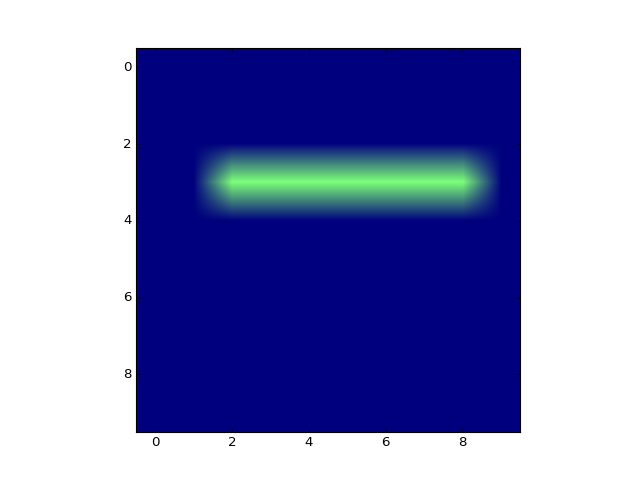

Let's play Battleship!

The size of the grid is 10x10. Enter your target location
as x, y.


A Jupyter Widget

In [37]:
%matplotlib notebook

from ipywidgets import widgets
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import random

# Create a 2d numpy array (simular to a python list but much faster.)
battlefield = np.zeros((10, 10))

def random_coord(battlefield):
    x = random.randint(0, battlefield.shape[0]-1)
    y = random.randint(0, battlefield.shape[1]-1)
    return x, y

ship_location = random_coord(battlefield)

fig = plt.figure()
bf = plt.imshow(battlefield, vmin=0, vmax=2)
plt.show()

print("""Let's play Battleship!

The size of the grid is 10x10. Enter your target location
as x, y.""")
coords = widgets.Text()
display(coords)

def update_map(sender):
    x, y = [int(x) for x in sender.value.split(", ")]
    sender.value = ""
    battlefield = bf.get_array()
    if ship_location == (x, y):
        battlefield[x, y] = 2
        print("Congratulations! You sunk the battleship!")
    else:
        battlefield[x, y] = 1
    bf.set_array(battlefield)
    fig.canvas.draw()

coords.on_submit(update_map)

## Handling errors in input

I am quite sure that during the course of the game above you encountered some run-time errors. Perhaps you specified an index that was out of bounds, or perhaps you provided text as input when a number was expected. In real life, users make mistakes all the time. For this reason it is important to understand where errors may arise in a program and add code to catch these errors and make the program react in some sensible way. You can already see that errors can sometimes be very confusing to the user. Good error handling can be used to help the user understand what mistake was made and suggest a solution. In some cases you can even guess what was intended and correct automatically.

Let's consider a simple example where we make a reference out of bounds in a list:

In [6]:
places_i_would_rather_be = ("pub", "Fernanda de Noronha", "Dolomites", "anywhere but here")
option = 4 # lets assume that the user has given the input option 4
print(places_i_would_rather_be[option])

IndexError: tuple index out of range

Here we can see we have an **IndexError** (i.e. a reference out of bounds) with the clarification that it is the **tuple index out of range**.

The general way we deal with this issue in Python (and in many other programming languages) is to try to do what we indend to, and if it fails, we recover from the error. This is implemented using the *try-except* block:
```
try:
    <statements we indend to do>
except:
    <statements for handling errors>
```

If something goes wrong in the **try** block, Python raises an **exception** and the execution jumps immediately to the **except** block. Let's try an example:

In [2]:
import sys
places_i_would_rather_be = ("Pub", "Fernanda de Noronha", "Dolomites", "Anywhere but here")
glib_reply = ("Don't drink and code.", "Rubbish broadband - couldn't stream Lost.", 
                "My first ski lesson was watching YouTube (don't try).", "Ah don't go...your great craic.")

msg = """Where would you rather be (specify option 0-3)?
0. %s
1. %s
2. %s
3. %s
""" % places_i_would_rather_be

try:
    option = int(input(msg))
    print(glib_reply[option])
except:
    print("ERROR: You need to specify an integer")
    sys.exit(1)

Where would you rather be (specify option 0-3)?
0. Pub
1. Fernanda de Noronha
2. Dolomites
3. Anywhere but here
4
ERROR: You need to specify an integer


SystemExit: 1

/home/nbuser/anaconda3_410/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2870: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In the above example the expected input is an integer. If the user types a string, e.g. "Pub", then a **ValueError** is raised, and the code except block is executed.

However, what happens if you type 4, or 100? In that case it is a valid integer, but then it is used as an index to the tuple *glib\_reply* it clearly references an element that does not exist. This results in an **IndexError**. But the error message we get back is still *ERROR: You need to specify an integer*. So, how can we make our error handling more intellegent?

Well, there are two solutions here. We can either break up our *try* block so we try the integer conversion and the glib reply separately, i.e.:

In [ ]:
try:
    option = int(input(msg))
except:
    print("ERROR: You need to specify an integer")
    sys.exit(1)
try:
    print(glib_reply[option])
except:
    print("ERROR: You need to specify an integer between in the range 0-3.")
    sys.exit(1)

However, an even better solution is to create an *except* block that is specialised for a specific error type, i.e.:

In [ ]:
try:
    option = int(input(msg))
    print(glib_reply[option])
except ValueError:
    print("ERROR: You need to specify an integer")
    sys.exit(1)
except IndexError:
    print("ERROR: You need to specify an integer between in the range 0-3.")
    sys.exit(1)

This is still not perfect. What happens if you enter -1? Recall that negative indices traverse the list from the end to the beginning. Also, it is a bit messy that we have to print out the message and then call sys.exit to abort the program. We can deal with this issue more elegently if we **raise** our own error:

In [1]:
try:
    option = int(input(msg))
    if not (0 <= option <= 3):
        raise ValueError
    print(glib_reply[option])
except ValueError:
    raise ValueError("You need to specify an integer value.")
except IndexError:
    raise IndexError("You need to specify an integer between in the range 0-3.")

NameError: name 'msg' is not defined

## <span style="color:blue">Exercise 4.4: Use exceptions</span>
Extend the program from Exercise 1 with a try-except block to handle the potential error that the user enters nothing (or invalid data such as a letter) for the Fahrenheit temperature.

In [1]:
from ipywidgets import widgets
from IPython.display import display

def FtoC(sender):
    try:
        option = int(sender.value)
        if option <= -460:
            print("IndexError: Enter a value greater than -460 degrees Fahrenheit")
  
    except

      print(F, "degrees Fahrenheit is ", (5/9)*(F-32), "degrees Celsius")
        
widget_FtoC = widgets.Text()
widget_FtoC.on_submit(FtoC) 
display(widget_FtoC)

SyntaxError: invalid syntax (<ipython-input-1-6ae25c91bb6c>, line 10)

## <span style="color:blue">Exercise 4.5: Make the program from Exercise 4.2 safer</span>
Extend the program from Exercise 4.2 to include exception handling such that missing (or invalid) values for *t* and *v0* are detected.

## <span style="color:blue">Exercise 4.6: Test more in the program</span>
Test if the *t* value read in the program from the previous exercise lies between $0$ and ${2v_0}/{g}$. If not, raise a *ValueError* exception in the *if* test on legal *t* values in the program from the previous exercise. Include the legal interval for *t* in the exception message.

## <span style="color:blue">Exercise 4.7: Compute the distance it takes to stop a car</span>
A car driver, driving at velocity $v_0$, suddenly puts on the brake. What braking distance $d$ is needed to stop the car? One can derive, from basic physics, that</br>
$d = 0.5\frac{v_0^2}{\mu g}$</br>
Make a program for computing $d$ using the above formula when the initial car velocity $v_0$ and the friction coefficient $\mu$ are provided via the text widget. Run the
program for two cases: $v_0$ = 120 and $v_0$ = 50 km/h, both with $\mu$ = 0.3 ($\mu$ is dimensionless). (Remember to convert the velocity from km/h to m/s before inserting the value in the formula!)

In [20]:
from ipywidgets import widgets
from IPython.display import display

g = 9.81

def d_v0_u(sender):
    txt_input = sender.value
    v0, u = txt_input.split(",")
    v0 = float(v0)
    u = float(u)
    print("distance needed to brake is %f " % ((0.5*v0**2)/(u*g)), "metres")
    
widget_d_v0_u = widgets.Text()
widget_d_v0_u.on_submit(d_v0_u) 
display(widget_d_v0_u)

# 150km/h is 33.33333 m/s
# 50 km/h is 13.8889 m/s 


A Jupyter Widget

distance needed to brake is 188.771813  metres
distance needed to brake is 32.772943  metres
